## Demo notebook for creating CPOMDPs

Creating a Consumption POMDP in FiPOMDP is analogous to creating a Consunption MDP in FiMDP, with the addition of observations.

Let's create a CPOMDP as depicted in the picture below

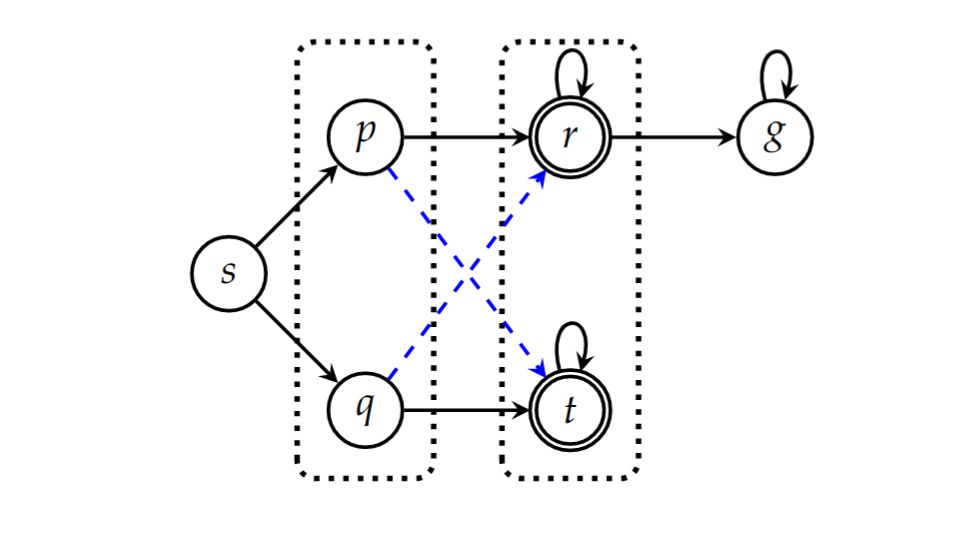

In [17]:
from IPython.display import Image
Image("demo_cpomdp.png")

The observations are visualized as dashed rectangles, and states without any rectangle have their own observation which is unique to those states. Reload states are visualized as states with doubled outlines. The graph omits full dynamics of POMDPs, namely different actions and consumption, and also the weights on probabilistic distribution for the observtions and actions. To simplify, we are going to assume a uniform probabilistic distribution among all actions and observations. We are also going to assume two possible actions *a, b*. In states where there is only one outgoing arrow we assume that both actions are identical and in states *p, q*, the dashed blue line represents action *b* and white full line represents action *a*. Also assumed is the identical consumption

In [24]:
from fipomdp import ConsPOMDP

cpomdp = ConsPOMDP()

# states
cpomdp.new_state(reload = False, name='s')  # index 0
cpomdp.new_state(reload = False, name='p')  # index 1
cpomdp.new_state(reload = False, name='q')  # index 2
cpomdp.new_state(reload = True, name='r')   # index 3
cpomdp.new_state(reload = True, name='t')   # index 4
cpomdp.new_state(reload = False, name='g')  # index 5

# observations
observations = dict()
observations[(0, 0)] = 1  # observation with state s

observations[(1, 1)] = 1  # observation with states p, q
observations[(2, 1)] = 1

observations[(3, 2)] = 1  # observation with states r, t
observations[(4, 2)] = 1

observations[(5, 3)] = 1  # observation with state g

obs_names = ['obs_s', 'obs_pq', 'obs_rt', 'obs_g']

cpomdp.set_observations(4, observations, obs_names)

# actions
cpomdp.add_action(src= 0, distribution= {1: 0.5, 2: 0.5}, label= "s->action a or b", consumption= 1)
cpomdp.add_action(src= 1, distribution= {3: 1}, label= "p->action a", consumption= 1)
cpomdp.add_action(src= 2, distribution= {4: 1}, label= "q->action a", consumption= 1)
cpomdp.add_action(src= 1, distribution= {4: 1}, label= "p->action b", consumption= 1)
cpomdp.add_action(src= 2, distribution= {3: 1}, label= "p->action b", consumption= 1)
cpomdp.add_action(src= 3, distribution= {3: 0.5, 5: 0.5}, label= "r->action a or b", consumption= 1)
cpomdp.add_action(src= 4, distribution= {4: 1}, label= "t->action a or b", consumption= 1)
cpomdp.add_action(src= 5, distribution= {5: 1}, label= "g->action a or b", consumption= 1)

print(cpomdp.get_state_obs_probs(3))

{2: 1}
